In [48]:
import pandas as pd
import numpy as np
import seaborn as sns

In [49]:
beers = pd.read_csv('beers.csv')

In [50]:
breweries = pd.read_csv('breweries.csv')

In [51]:
reviews = pd.read_csv('reviews.csv')

### Exploring the reviews

In [12]:
reviews.shape

(9073128, 10)

In [13]:
reviews.columns

Index(['beer_id', 'username', 'date', 'text', 'look', 'smell', 'taste', 'feel',
       'overall', 'score'],
      dtype='object')

In [30]:
reviews.username.value_counts()

Sammy            13798
kylehay2004      12221
acurtis          12016
StonedTrippin    11859
jaydoc           11800
                 ...  
ezerhoden14          1
hubbitron            1
Kec                  1
Bozorgmehr           1
pekenne              1
Name: username, Length: 164934, dtype: int64

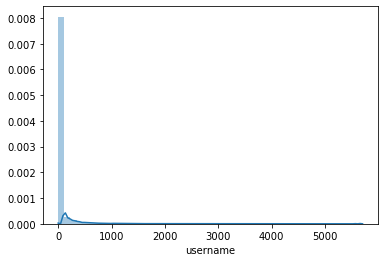

In [27]:
sns.distplot(reviews.username.value_counts()[50:])

In [31]:
reviews.head()

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31


In [7]:
reviews.beer_id.value_counts()

11757     17160
2093      15947
7971      14927
1093      14915
29619     14292
          ...  
203777        1
126326        1
109950        1
282050        1
8188          1
Name: beer_id, Length: 309542, dtype: int64

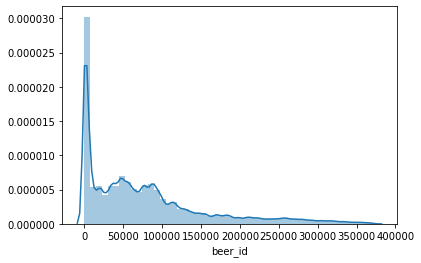

In [44]:
sns.distplot(reviews.beer_id)

In [36]:
reviews['text']

0             750 ml bottle, 2016 vintage, bottle #304 of...
1                                                           
2                                                           
3             0% 16 oz can. Funny story: As I finally wal...
4             Classic TH NEIPA. Overflowing head and bouq...
                                 ...                        
9073123                                                     
9073124                                                     
9073125                                                     
9073126                                                     
9073127                                                     
Name: text, Length: 9073128, dtype: object

In [25]:
reviews.iloc[2].text

'\xa0\xa0'

In [56]:
reviews_sub['text'] = reviews_sub['text'].replace(u'\xa0\xa0', '')

//anaconda3/envs/sklearn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
reviews_sub.iloc[2].text

''

In [52]:
reviews['text'] = reviews['text'].replace(u'\xa0\xa0', '')

In [10]:
reviews.loc[reviews['text'] == '']

,beer_id,username,date,text,look,smell,taste,feel,overall,score
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75
5,125646,jneff33,2017-12-20,,4.50,4.75,5.00,5.00,5.00,4.91
6,125646,yummybeer,2017-12-19,,4.75,4.50,4.75,4.75,4.75,4.69
8,125646,wwoj,2017-12-16,,5.00,4.75,4.50,4.50,4.50,4.59
...,...,...,...,...,...,...,...,...,...,...
9073123,104824,CTJman,2014-06-08,,NaN,NaN,NaN,NaN,NaN,4.00
9073124,104824,IMSPEAKNOENGLISH,2014-06-06,,NaN,NaN,NaN,NaN,NaN,5.00
9073125,104824,twizzard,2014-06-05,,NaN,NaN,NaN,NaN,NaN,5.00
9073126,104824,bootdown21,2014-06-04,,NaN,NaN,NaN,NaN,NaN,4.50


## Will most likely use the below subset only reviews that have text

In [68]:
reviews.loc[reviews['text'] != '']

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31
7,125646,MFMB,2017-12-16,Pours a creamy opaque light straw yellow wi...,4.75,4.50,4.50,4.50,4.50,4.52
13,125646,jngrizzaffi,2017-12-10,Pours a cloudy yellow color with a thin foa...,4.50,4.50,4.50,4.75,4.50,4.53
...,...,...,...,...,...,...,...,...,...,...
9073095,58482,smcolw,2009-08-22,Large chalky white head. Leaves lots of spo...,4.00,3.50,3.50,4.00,3.50,3.58
9073096,58482,firkinhophead,2009-08-21,"pours a hazy, almost cloudy, autumn gold. A...",3.50,4.00,4.00,3.50,4.00,3.92
9073097,58482,CHADMC3,2009-08-21,Pours a hazy golden/orange to copper with a...,4.00,4.00,3.50,4.00,4.00,3.80
9073110,104824,zookerman182,2014-06-24,Appearance is dark dark brown with a half f...,4.25,4.75,4.25,4.00,4.25,4.35


In [53]:
text_reviews = reviews.loc[reviews['text'] != '']

In [72]:
text_reviews.text.value_counts()

   0%                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [13]:
text_reviews.smell.isna().sum()

164241

In [14]:
(text_reviews[text_reviews.smell.isna() == True].index == text_reviews[text_reviews.overall.isna() == True].index).sum()

164241

### 164k of the text_reviews subset has NaN attribute ratings, whole dataset has 3.8 million. Makes sense as those that fill out a text review are likely to fill out the numerical ratings

In [54]:
# subset data to exclude NaN's as well
text_no_nan = text_reviews.loc[text_reviews.smell.isna() == False]

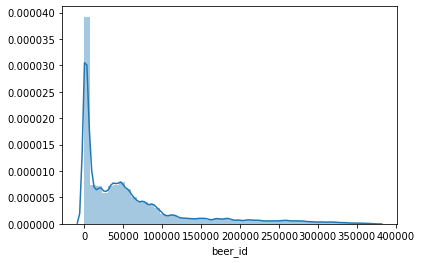

In [19]:
sns.distplot(text_no_nan.beer_id)

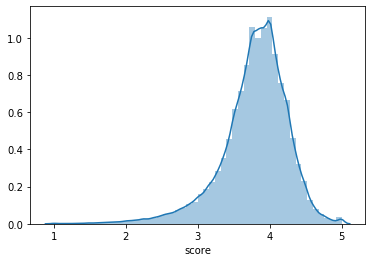

In [61]:
sns.distplot(text_no_nan.groupby(['beer_id']).score.mean())

## 210k beers have been reviewed in the subset of 'text_reviews': no empty text, but NaN attributes (2.99 million reviews)

## 137k beers have been reviewed in the subset 'text_no_nan': no empty text, no NaN attribute (2.8 million reviews)

In [62]:
(text_no_nan.beer_id.value_counts() > 49).sum()

8928

In [63]:
(text_no_nan.beer_id.value_counts() > 9).sum()

31310

### Only ~9k beers have 50+ reviews, 31k with 10+

In [75]:
(reviews[reviews.smell.isna() == True].index == reviews[reviews.overall.isna() == True].index).sum()

3790018

In [76]:
reviews.loc[(reviews['text'] == '') & (reviews.smell.isna() == True)]

,beer_id,username,date,text,look,smell,taste,feel,overall,score
57,235178,Bryan12345,2016-06-12,,NaN,NaN,NaN,NaN,NaN,4.25
70,104824,Reagan1984,2014-05-26,,NaN,NaN,NaN,NaN,NaN,4.50
71,104824,Chibeerguy1,2014-05-26,,NaN,NaN,NaN,NaN,NaN,4.75
72,104824,AaronBurr,2014-05-26,,NaN,NaN,NaN,NaN,NaN,4.00
74,104824,dfhhead25,2014-05-24,,NaN,NaN,NaN,NaN,NaN,3.50
...,...,...,...,...,...,...,...,...,...,...
9073123,104824,CTJman,2014-06-08,,NaN,NaN,NaN,NaN,NaN,4.00
9073124,104824,IMSPEAKNOENGLISH,2014-06-06,,NaN,NaN,NaN,NaN,NaN,5.00
9073125,104824,twizzard,2014-06-05,,NaN,NaN,NaN,NaN,NaN,5.00
9073126,104824,bootdown21,2014-06-04,,NaN,NaN,NaN,NaN,NaN,4.50


In [30]:
no_text_and_nan = reviews.loc[(reviews['text'] == '') & (reviews.smell.isna() == True)]

In [ ]:
no_text_and_nan

In [ ]:
sns.distplot(no_text_and_nan.date)

In [11]:
nan_revs = reviews[reviews.look.isna() == True]

In [19]:
nan_revs.loc[nan_revs['text'] == '']

,beer_id,username,date,text,look,smell,taste,feel,overall,score


In [24]:
reviews

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31
...,...,...,...,...,...,...,...,...,...,...
9073123,104824,CTJman,2014-06-08,,NaN,NaN,NaN,NaN,NaN,4.00
9073124,104824,IMSPEAKNOENGLISH,2014-06-06,,NaN,NaN,NaN,NaN,NaN,5.00
9073125,104824,twizzard,2014-06-05,,NaN,NaN,NaN,NaN,NaN,5.00
9073126,104824,bootdown21,2014-06-04,,NaN,NaN,NaN,NaN,NaN,4.50


In [27]:
no_text = reviews[reviews.text == '']

In [29]:
no_text[no_text.look.isna()]

,beer_id,username,date,text,look,smell,taste,feel,overall,score
57,235178,Bryan12345,2016-06-12,,NaN,NaN,NaN,NaN,NaN,4.25
70,104824,Reagan1984,2014-05-26,,NaN,NaN,NaN,NaN,NaN,4.50
71,104824,Chibeerguy1,2014-05-26,,NaN,NaN,NaN,NaN,NaN,4.75
72,104824,AaronBurr,2014-05-26,,NaN,NaN,NaN,NaN,NaN,4.00
74,104824,dfhhead25,2014-05-24,,NaN,NaN,NaN,NaN,NaN,3.50
...,...,...,...,...,...,...,...,...,...,...
9073123,104824,CTJman,2014-06-08,,NaN,NaN,NaN,NaN,NaN,4.00
9073124,104824,IMSPEAKNOENGLISH,2014-06-06,,NaN,NaN,NaN,NaN,NaN,5.00
9073125,104824,twizzard,2014-06-05,,NaN,NaN,NaN,NaN,NaN,5.00
9073126,104824,bootdown21,2014-06-04,,NaN,NaN,NaN,NaN,NaN,4.50


-----

In [49]:
breweries.loc[breweries.id == 1199]

,id,name,city,state,country,notes,types
34812,1199,Founders Brewing Company,Grand Rapids,MI,US,Mahou San Miguel has a 30% ownership stake sin...,"Brewery, Bar, Eatery, Beer-to-go"


In [57]:
breweries.loc[breweries.country == 'DE']

,id,name,city,state,country,notes,types
83,33078,Brauhaus Alter Elbehof,Torgau,NaN,DE,No notes at this time.,"Brewery, Bar, Eatery"
89,18049,Landhaus - Krähennest,Löf - Mosel,NaN,DE,No notes at this time.,"Bar, Eatery, Beer-to-go"
129,6200,Maxl Bräu,Neu-Ulm,NaN,DE,No notes at this time.,Brewery
146,46383,Munich Brew Mafia,München,NaN,DE,No notes at this time.,Brewery
147,6696,Adler Brauerei und Brennerei Gebhard Föhr,Ehingen,NaN,DE,No notes at this time.,Brewery
...,...,...,...,...,...,...,...
50208,5819,Brauerei Goss,Deuerling,NaN,DE,No notes at this time.,"Brewery, Bar, Beer-to-go"
50255,6669,Demmert Bräu,Neuendorf Altmark,NaN,DE,No notes at this time.,Brewery
50283,7706,Bolten Brauerei,Korschenbroich,NaN,DE,No notes at this time.,Brewery
50295,7602,Brauerei Rechenberg,Rechenberg-Bienenmühle,NaN,DE,No notes at this time.,Brewery


In [59]:
breweries.notes.unique()

array(['No notes at this time.',
       'Duplicate of https://www.beeradvocate.com/beer/profile/36929',
       'At Modist, we push past traditional brewing by embracing creativity and unconstrained experimentation. ',
       ...,
       'Pacific Rim is closed: http://beeradvocate.com/beer/profile/931 ',
       'Big gourmet market, with a beer store and a beer bar in the basement.',
       'Located on the Ground Floor of Oxford House in TaiKoo Place.'],
      dtype=object)

In [62]:
breweries.city.isna().sum()

58

### Probably need to clean up 'store' - or check how many reviews are listed to the store

In [63]:
breweries

,id,name,city,state,country,notes,types
0,19730,Brouwerij Danny,Erpe-Mere,NaN,BE,No notes at this time.,Brewery
1,32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,No notes at this time.,"Brewery, Bar, Beer-to-go"
2,44736,Beef 'O' Brady's,Plant City,FL,US,No notes at this time.,"Bar, Eatery"
3,23372,Broadway Wine Merchant,Oklahoma City,OK,US,No notes at this time.,Store
4,35328,Brighton Beer Dispensary (DUPLICATE),Brighton,GB2,GB,Duplicate of https://www.beeradvocate.com/beer...,"Bar, Eatery"
...,...,...,...,...,...,...,...
50342,1430,Blagodarnensky Brewery,Blagodarny,NaN,RU,No notes at this time.,Brewery
50343,23267,Eataly,Torino (TO),NaN,IT,"Big gourmet market, with a beer store and a be...","Bar, Eatery, Beer-to-go"
50344,32352,Frites - Quarry Bay,Hong Kong Island,NaN,HK,Located on the Ground Floor of Oxford House in...,"Bar, Eatery"
50345,20047,Forest City Wines & Spirits,Middletown,CT,US,No notes at this time.,Store


# BEERS

In [86]:
beers['style'].value_counts()

American IPA                       44719
American Pale Ale (APA)            22159
American Imperial IPA              18338
Belgian Saison                     18167
American Wild Ale                  12972
                                   ...  
Japanese Happoshu                    123
Finnish Sahti                        123
Bière de Champagne / Bière Brut      116
Belgian Faro                          32
Wild/Sour Beers                        4
Name: style, Length: 112, dtype: int64

In [79]:
beers['availability'].value_counts()

 Rotating                  98776
 Limited (brewed once)     72047
 Year-round                56800
Rotating                   48002
Limited (brewed once)      34798
Year-round                 19744
 Winter                     6427
 Fall                       5908
 Summer                     5136
 Spring                     3349
Fall                        2310
Winter                      2293
Summer                      1973
Spring                      1286
 Limited (brewed once)         9
 Rotating                      6
 Year-round                    4
 Fall                          3
 Winter                        1
 Summer                        1
Name: availability, dtype: int64

In [83]:
(beers['availability'] == ' Rotating').sum()

98776

In [84]:
(beers['availability'] == 'Rotating').sum()

48002

In [122]:
beers['availability'] = beers['availability'].replace(' Rotating', 'Rotating')
beers['availability'] = beers['availability'].replace(' Rotating ', 'Rotating')
beers['availability'] = beers['availability'].replace(' Limited (brewed once)', 'Limited (brewed once)')
beers['availability'] = beers['availability'].replace(' Limited (brewed once) ', 'Limited (brewed once)')
beers['availability'] = beers['availability'].replace(' Year-round', 'Year-round')
beers['availability'] = beers['availability'].replace(' Year-round ', 'Year-round')
beers['availability'] = beers['availability'].replace(' Winter', 'Winter')
beers['availability'] = beers['availability'].replace(' Winter ', 'Winter')
beers['availability'] = beers['availability'].replace(' Fall', 'Fall')
beers['availability'] = beers['availability'].replace(' Fall ', 'Fall')
beers['availability'] = beers['availability'].replace(' Summer', 'Summer')
beers['availability'] = beers['availability'].replace(' Summer ', 'Summer')
beers['availability'] = beers['availability'].replace(' Spring', 'Spring')
beers['availability'] = beers['availability'].replace(' Spring ', 'Spring')

In [123]:
beers['availability'].value_counts()

Rotating                 146784
Limited (brewed once)    106854
Year-round                76548
Winter                     8721
Fall                       8221
Summer                     7110
Spring                     4635
Name: availability, dtype: int64

In [131]:
beers.loc[(beers['country'] == 'US') | (beers['country'] == 'CA')]

,id,name,brewery_id,state,country,style,availability,abv,notes,retired,availbility
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f,Rotating
2,214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,No notes at this time.,t,Year-round
3,320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,Every time this year,f,Winter
4,246438,Peaches-N-Cream,44617,PA,US,American Cream Ale,Rotating,5.1,No notes at this time.,f,Rotating
6,108605,Icon Sender,22598,CA,US,American Lager,Year-round,5.6,No notes at this time.,f,Year-round
...,...,...,...,...,...,...,...,...,...,...,...
358867,146613,American Pale Ale,36926,WI,US,American Pale Ale (APA),Rotating,NaN,No notes at this time.,t,Rotating
358868,267703,Collective Project: Gose,32763,ON,CA,Leipzig Gose,Limited (brewed once),5.0,Our Gose is an unfiltered wheat beer made with...,t,Limited (brewed once)
358870,187618,RIPTA,34665,RI,US,Belgian Tripel,Rotating,9.5,No notes at this time.,f,Rotating
358871,283124,Rumble Fish,29238,MI,US,American Imperial IPA,Rotating,8.3,No notes at this time.,f,Rotating


### 118k are retired beers

In [132]:
beers['retired'].value_counts()

f    240480
t    118393
Name: retired, dtype: int64

In [135]:
current_beer = beers[beers['retired'] == 'f']

In [136]:
current_beer

,id,name,brewery_id,state,country,style,availability,abv,notes,retired,availbility
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f,Rotating
1,82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Russian Imperial Stout,Rotating,10.4,No notes at this time.,f,Rotating
3,320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,Every time this year,f,Winter
4,246438,Peaches-N-Cream,44617,PA,US,American Cream Ale,Rotating,5.1,No notes at this time.,f,Rotating
6,108605,Icon Sender,22598,CA,US,American Lager,Year-round,5.6,No notes at this time.,f,Year-round
...,...,...,...,...,...,...,...,...,...,...,...
358865,258269,Brewers Select #019 High Pressure Lager,28281,WA,US,American Lager,Rotating,4.5,No notes at this time.,f,Rotating
358866,307651,Drunkard's Cloak,32722,ON,CA,Belgian Saison,Limited (brewed once),NaN,No notes at this time.,f,Limited (brewed once)
358869,300013,Tripel,50238,NaN,BE,Belgian Tripel,Year-round,8.0,No notes at this time.,f,Year-round
358870,187618,RIPTA,34665,RI,US,Belgian Tripel,Rotating,9.5,No notes at this time.,f,Rotating


### Join non-retired beers df to our current list of reviews (text_no_nan)

In [137]:
reviews_beer = pd.merge(text_no_nan, current_beer,
                        left_on = 'beer_id',
                        right_on = 'id')

In [143]:
(reviews_beer.beer_id.value_counts() > 9).sum()

22514

In [144]:
(reviews_beer.beer_id.value_counts() > 49).sum()

6893

In [ ]:
beers